In [1]:
import pandas as pd

# read everything as strings
df = pd.read_csv(
    '../data_raw/MachineLearningRating_v3.txt',
    sep='|',
    dtype=str,
    keep_default_na=False
)

# parse TransactionMonth (YYYY-MM-DD HH:MM:SS)
df['TransactionMonth'] = pd.to_datetime(
    df['TransactionMonth'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

# parse VehicleIntroDate (format is MM/YYYY or M/YYYY)
df['VehicleIntroDate'] = pd.to_datetime(
    df['VehicleIntroDate'],
    format='%m/%Y',
    errors='coerce'
)

In [2]:
# data summarization
df.describe(include='all').T
df.dtypes

UnderwrittenCoverID                 object
PolicyID                            object
TransactionMonth            datetime64[ns]
IsVATRegistered                     object
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                          object
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                              object
VehicleType                         object
RegistrationYear                    object
make                                object
Model                               object
Cylinders  

In [5]:
# change str data type to numeric
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')

# Loss Ratio overall and by groups
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
overall_lr = df['LossRatio'].mean()
by_province = df.groupby('Province')['LossRatio'].agg(['mean', 'count', 'std'])


c:\Users\PC\OneDrive\Desktop\tenx\week3\tenxWeek-3\.venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [6]:
# missing values
(df.isnull().mean()*100).sort_values(ascending=False).head(30)

LossRatio              38.144662
VehicleIntroDate        4.875622
TransactionMonth        0.000000
PolicyID                0.000000
UnderwrittenCoverID     0.000000
LegalType               0.000000
Title                   0.000000
Language                0.000000
Bank                    0.000000
AccountType             0.000000
MaritalStatus           0.000000
Gender                  0.000000
Country                 0.000000
Province                0.000000
PostalCode              0.000000
MainCrestaZone          0.000000
SubCrestaZone           0.000000
ItemType                0.000000
mmcode                  0.000000
IsVATRegistered         0.000000
Citizenship             0.000000
RegistrationYear        0.000000
VehicleType             0.000000
Cylinders               0.000000
make                    0.000000
cubiccapacity           0.000000
kilowatts               0.000000
bodytype                0.000000
Model                   0.000000
CustomValueEstimate     0.000000
dtype: flo

In [4]:
for col in ["TotalClaims", "TotalPremium", "CustomValueEstimate"]:
    df[col] = df[col].astype(str)          # force string
    df[col] = df[col].str.strip()          # remove spaces
    df[col] = df[col].replace("", "0")     # convert empty to zero
    df[col] = pd.to_numeric(df[col], errors='coerce')


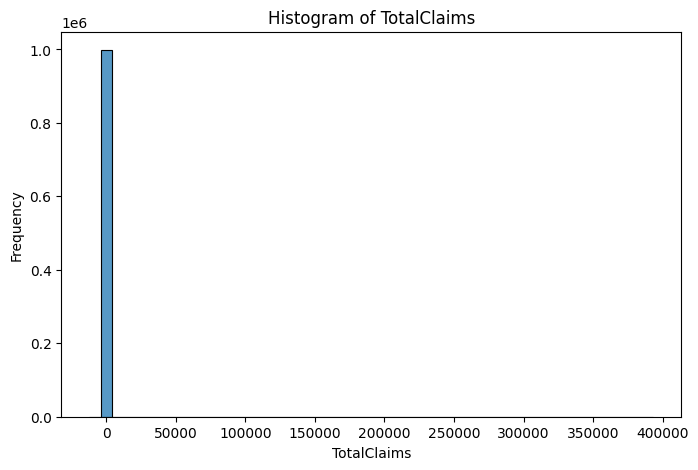

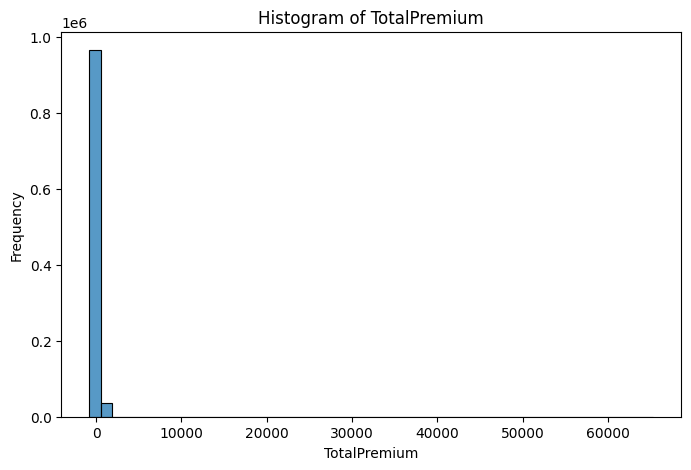

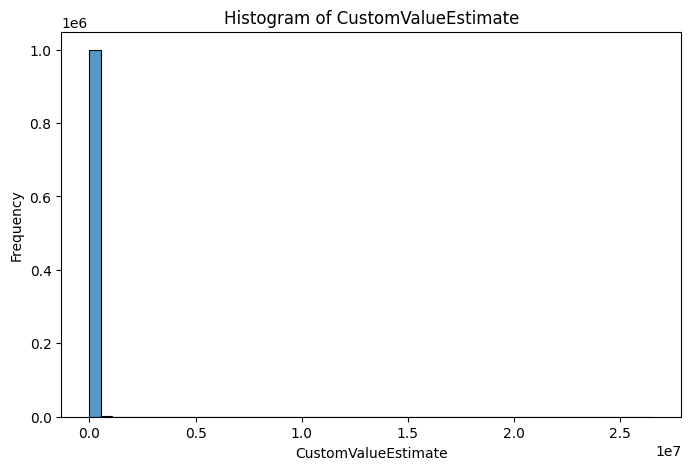

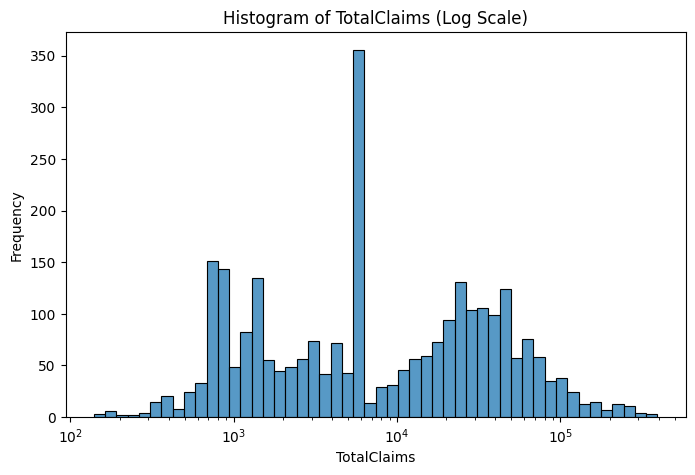

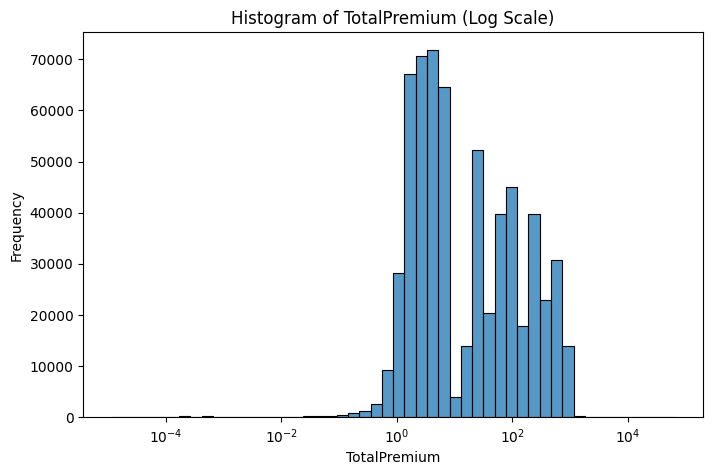

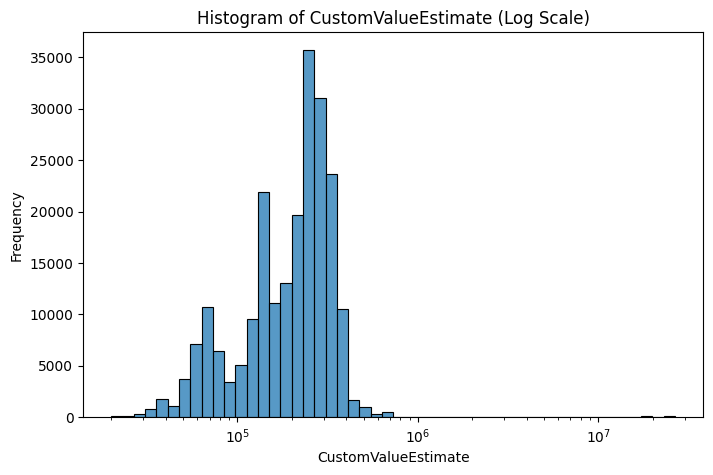

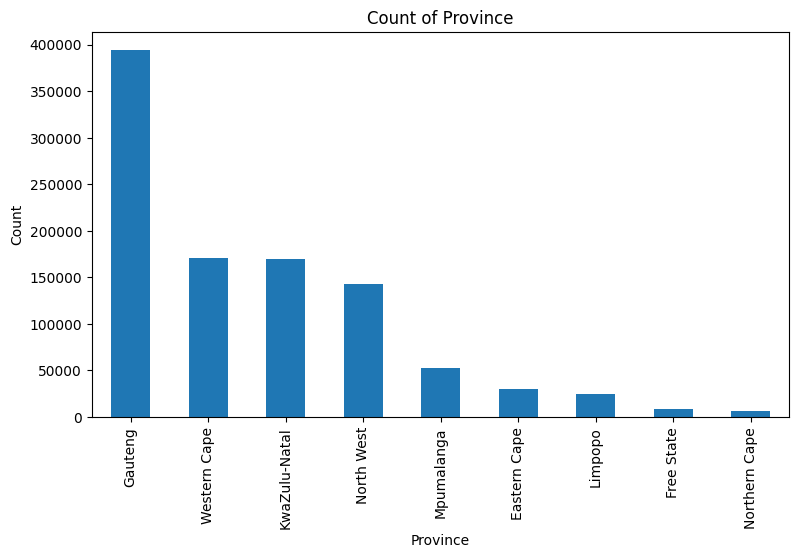

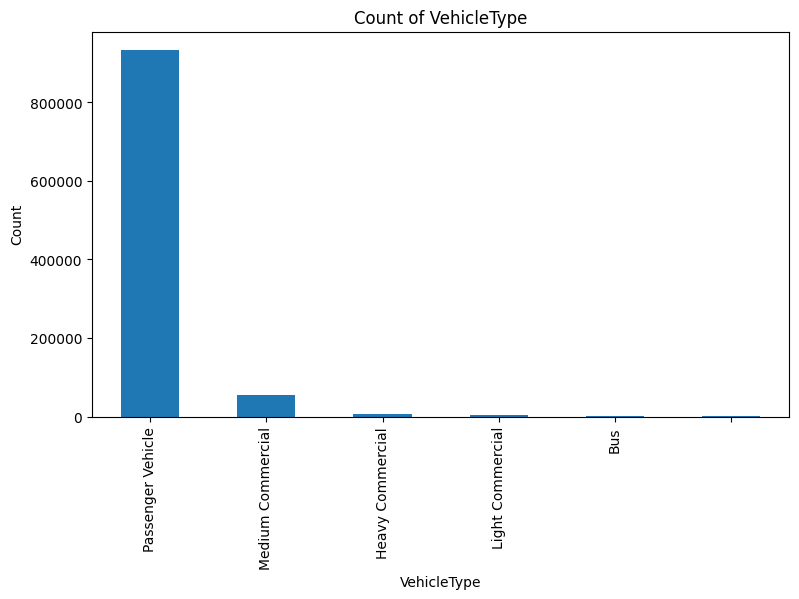

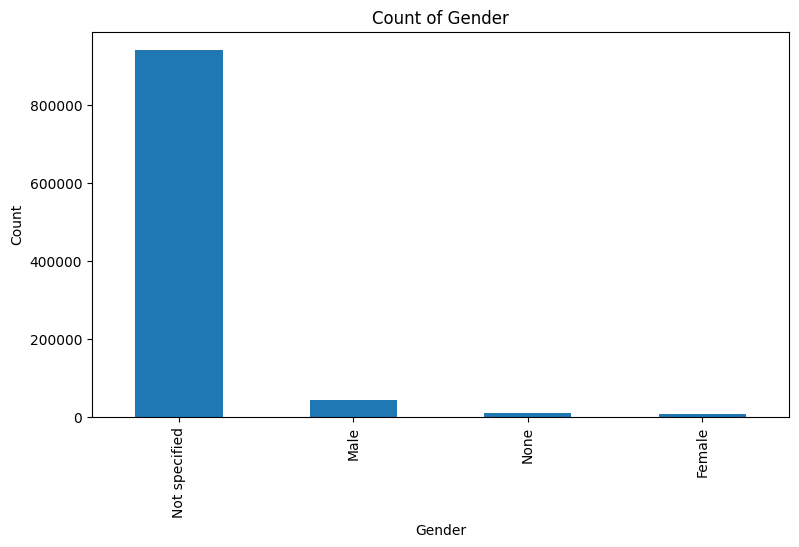

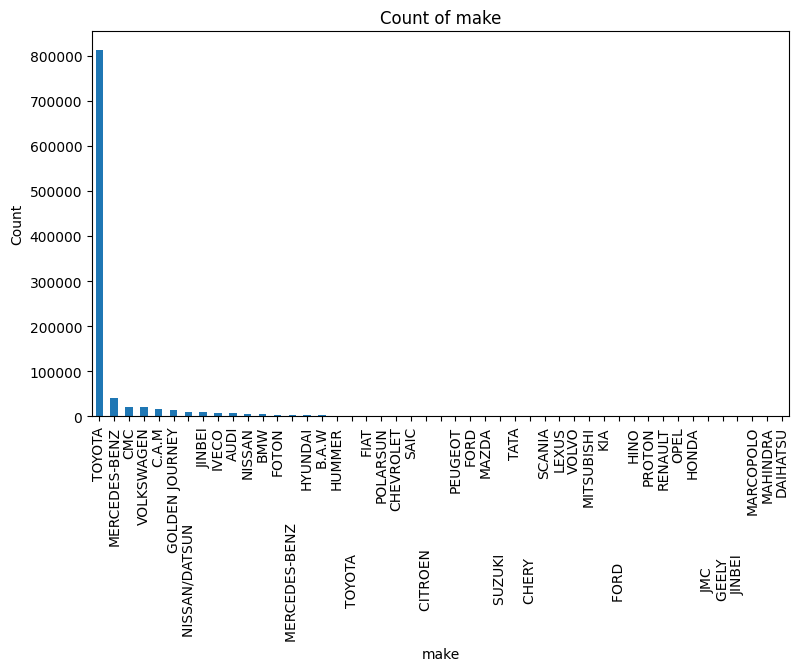

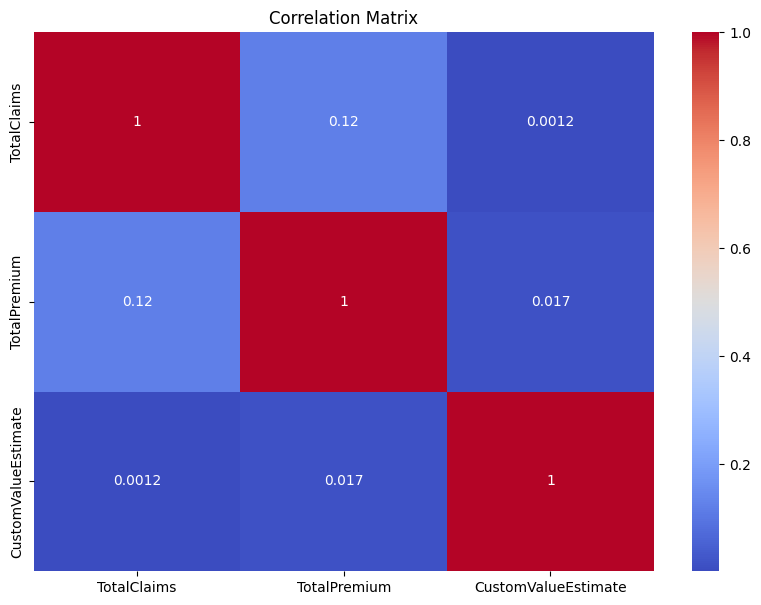

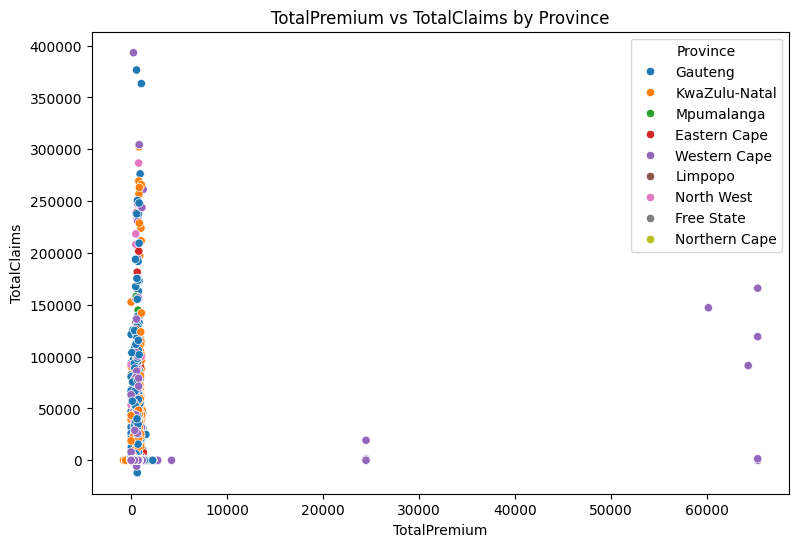

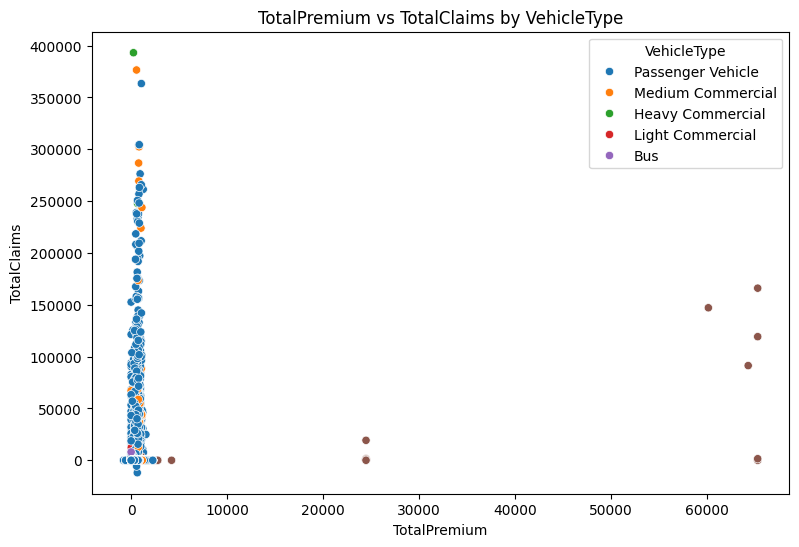

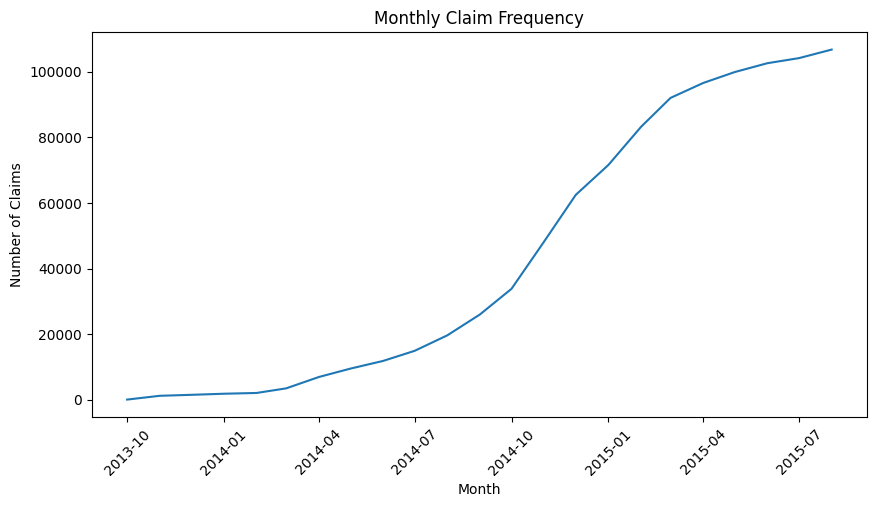

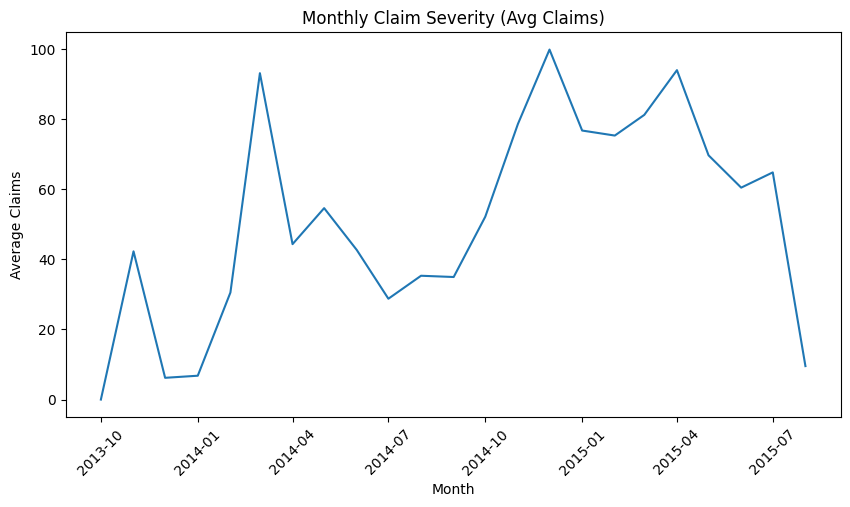

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTS

numeric_cols = ["TotalClaims", "TotalPremium", "CustomValueEstimate"]

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Log-scale versions (for skewness)
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=50, log_scale=True)
    plt.title(f"Histogram of {col} (Log Scale)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Bar charts for categorical variables
categorical_cols = ["Province", "VehicleType", "Gender", "make"]

for col in categorical_cols:
    plt.figure(figsize=(9,5))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# BIVARIATE / MULTIVARIATE

    # Correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

    # Scatter plot TotalPremium vs TotalClaims colored by Province
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", hue="Province")
plt.title("TotalPremium vs TotalClaims by Province")
plt.show()

# Scatter plot colored by VehicleType
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims", hue="VehicleType")
plt.title("TotalPremium vs TotalClaims by VehicleType")
plt.show()

# Monthly time series for:
# - Claim frequency (# claims)
# - Claim severity (mean claims)
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')
df["Month"] = df["TransactionMonth"].dt.to_period("M").dt.to_timestamp()

monthly = df.groupby("Month").agg(
    claim_frequency=("TotalClaims", "count"),
    claim_severity=("TotalClaims", "mean")
).reset_index()

# Plot frequency
plt.figure(figsize=(10,5))
plt.plot(monthly["Month"], monthly["claim_frequency"])
plt.title("Monthly Claim Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.show()

# Plot severity
plt.figure(figsize=(10,5))
plt.plot(monthly["Month"], monthly["claim_severity"])
plt.title("Monthly Claim Severity (Avg Claims)")
plt.xlabel("Month")
plt.ylabel("Average Claims")
plt.xticks(rotation=45)
plt.show()


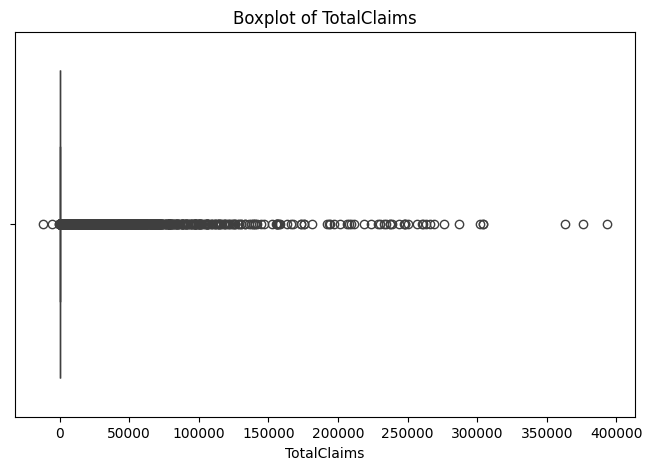

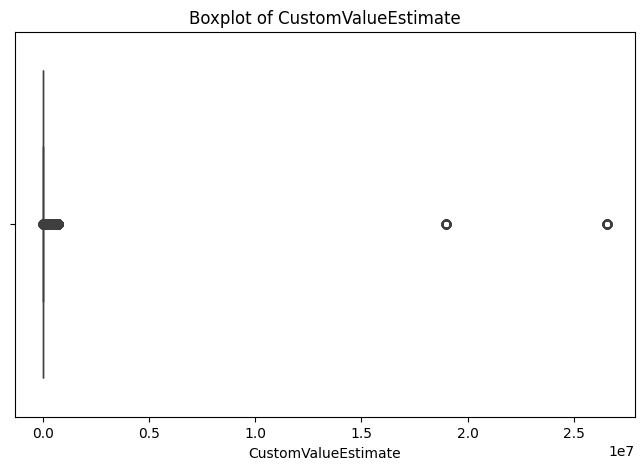

In [ ]:
# Boxplot for TotalClaims
plt.figure(figsize=(8,5))
sns.boxplot(x=df["TotalClaims"])
plt.title("Boxplot of TotalClaims")
plt.show()

# Boxplot for CustomValueEstimate
plt.figure(figsize=(8,5))
sns.boxplot(x=df["CustomValueEstimate"])
plt.title("Boxplot of CustomValueEstimate")
plt.show()
